The purpose of this notebook is to demonstrate various parameter tunings' impact on baseline model performance. Generally, only a single parameter will be tuned during each test; however, certain parameters will require multiple tunings, such as a 6x6 CNN layer requiring a certain input shape.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf
import metric_functions as mf

Using TensorFlow backend.


In [1]:
pip install Pillow --user

     |████████████████████████████████| 2.1MB 1.2MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras --user

     |████████████████████████████████| 378kB 750kB/s eta 0:00:01
     |████████████████████████████████| 276kB 976kB/s eta 0:00:01
Failed to build pyyaml
    Running setup.py install for pyyaml ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn --user

     |████████████████████████████████| 7.3MB 954kB/s eta 0:00:01
     |████████████████████████████████| 307kB 1.1MB/s eta 0:00:01
Failed to build sklearn
    Running setup.py install for sklearn ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Compile and Create Data <a id='data'></a>

## Identify Working Directory

In [2]:
working_directory = 'mixed_frames'

In [3]:
train_folder = os.path.join('mcu_data', working_directory, 'train')
train_mcu = os.path.join(train_folder, 'mcu')
train_non = os.path.join(train_folder, 'non_mcu')

test_folder = os.path.join('mcu_data', working_directory, 'test')
test_mcu = os.path.join(test_folder, 'mcu')
test_non = os.path.join(test_folder, 'non_mcu')

print('There are', len(os.listdir(train_mcu)) + len(os.listdir(train_non)), 'images in the Train set')
print('There are', len(os.listdir(test_mcu)) + len(os.listdir(test_non)), 'images in the Test set')

print('\n')

print('There are', len(os.listdir(train_mcu)), 'MCU images in the train set')
print('There are', len(os.listdir(train_non)), 'non-MCU images in the train set')
print('There are', len(os.listdir(test_mcu)), 'MCU images in the test set')
print('There are', len(os.listdir(test_non)), 'non-MCU images in the test set')

There are 5214 images in the Train set
There are 1852 images in the Test set


There are 1916 MCU images in the train set
There are 3298 non-MCU images in the train set
There are 478 MCU images in the test set
There are 1374 non-MCU images in the test set


## Create input data with image size of 185 x 100

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size = (185, 100),
    batch_size = 4148,
    color_mode = 'grayscale',
    subset = 'training')

val_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size = (185, 100),
    batch_size = 4148,
    color_mode = 'grayscale',
    subset = 'validation')


Found 3031 images belonging to 2 classes.
Found 756 images belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(185, 100), color_mode = 'grayscale', batch_size = 1781)

Found 1718 images belonging to 2 classes.


In [7]:
class_labels = ['Non-MCU', 'MCU']
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)
train_y = np.reshape(train_labels[:,0], (3031,1))
val_y = np.reshape(val_labels[:,0], (756,1))
test_y = np.reshape(test_labels[:,0], (1718,1))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

train_images shape: (3031, 185, 100, 1)
train_labels shape: (3031, 2)
val_images shape: (756, 185, 100, 1)
val_labels shape: (756, 2)
test_images shape: (1718, 185, 100, 1)
test_labels shape: (1718, 2)


### Create input data with image size of 128 x 128

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size = (128, 128),
    batch_size = 4172,
    color_mode = 'grayscale',
    subset = 'training')

val_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size = (128, 128),
    batch_size = 1042,
    color_mode = 'grayscale',
    subset = 'validation')

Found 4172 images belonging to 2 classes.
Found 1042 images belonging to 2 classes.


In [5]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 1852)

Found 1852 images belonging to 2 classes.


In [6]:
class_labels = ['Non-MCU', 'MCU']
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)
train_y = np.reshape(train_labels[:,0], (4172,1))
val_y = np.reshape(val_labels[:,0], (1042,1))
test_y = np.reshape(test_labels[:,0], (1852,1))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

train_images shape: (4172, 128, 128, 1)
train_labels shape: (4172, 2)
val_images shape: (1042, 128, 128, 1)
val_labels shape: (1042, 2)
test_images shape: (1852, 128, 128, 1)
test_labels shape: (1852, 2)


# Baseline Model Creation


In [8]:
model_4x4 = models.Sequential()
model_4x4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_4x4.add(layers.MaxPooling2D((2, 2)))

model_4x4.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_4x4.add(layers.MaxPooling2D((2, 2)))

model_4x4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4x4.add(layers.MaxPooling2D((2, 2)))

model_4x4.add(layers.Flatten())
model_4x4.add(layers.Dense(64, activation='relu'))
model_4x4.add(layers.Dense(1, activation='sigmoid'))

model_4x4.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [9]:
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_4x4 = model_4x4.fit(train_images,
                                                 train_y,
                                                 epochs=50,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y),
                                                callbacks=early_stopping)

Train on 4172 samples, validate on 1042 samples
Epoch 1/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.6656 - acc: 0.6254 - val_loss: 0.6486 - val_acc: 0.6756
Epoch 2/50
4172/4172 [==============================] - 6s 1ms/step - loss: 0.6129 - acc: 0.6500 - val_loss: 0.5651 - val_acc: 0.7035
Epoch 3/50
4172/4172 [==============================] - 6s 1ms/step - loss: 0.5846 - acc: 0.6994 - val_loss: 0.5520 - val_acc: 0.7179
Epoch 4/50
4172/4172 [==============================] - 6s 1ms/step - loss: 0.5152 - acc: 0.7435 - val_loss: 0.5779 - val_acc: 0.6919
Epoch 5/50
4172/4172 [==============================] - 6s 1ms/step - loss: 0.4613 - acc: 0.7788 - val_loss: 0.5499 - val_acc: 0.7217
Epoch 6/50
4172/4172 [==============================] - 6s 1ms/step - loss: 0.4093 - acc: 0.8075 - val_loss: 0.6540 - val_acc: 0.7274
Epoch 7/50
4172/4172 [==============================] - 6s 1ms/step - loss: 0.3392 - acc: 0.8562 - val_loss: 0.5752 - val_acc: 0.7562
Epoch 8/50
417

Accuracy 
 Train: 0.969, Test: 0.731
Loss 
 Train: 0.090, Test: 0.844 



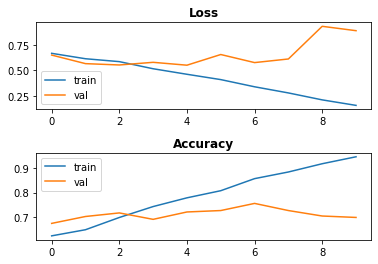



Confusion Matrix, without normalization


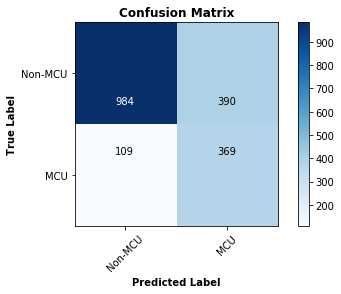



              precision    recall  f1-score   support

     Non-MCU       0.90      0.72      0.80      1374
         MCU       0.49      0.77      0.60       478

    accuracy                           0.73      1852
   macro avg       0.69      0.74      0.70      1852
weighted avg       0.79      0.73      0.75      1852



In [10]:
print(mf.evaluate_test(model_4x4, history_4x4, class_labels, train_images, test_images, train_y, test_y))

### 5x5

In [11]:
model_5x5 = models.Sequential()
model_5x5.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_5x5.add(layers.MaxPooling2D((2, 2)))

model_5x5.add(layers.Conv2D(32, (5, 5), activation='relu'))
model_5x5.add(layers.MaxPooling2D((2, 2)))

model_5x5.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_5x5.add(layers.MaxPooling2D((2, 2)))

model_5x5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_5x5.add(layers.MaxPooling2D((2, 2)))

model_5x5.add(layers.Flatten())
model_5x5.add(layers.Dense(64, activation='relu'))
model_5x5.add(layers.Dense(1, activation='sigmoid'))

model_5x5.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [12]:
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_5x5 = model_5x5.fit(train_images,
                                                 train_y,
                                                 epochs=50,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y),
                                                callbacks=early_stopping)

Train on 4172 samples, validate on 1042 samples
Epoch 1/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.6738 - acc: 0.6282 - val_loss: 0.6181 - val_acc: 0.6324
Epoch 2/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.6328 - acc: 0.6333 - val_loss: 0.7320 - val_acc: 0.6324
Epoch 3/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.6137 - acc: 0.6462 - val_loss: 0.5960 - val_acc: 0.6497
Epoch 4/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.5918 - acc: 0.6908 - val_loss: 0.6022 - val_acc: 0.6459
Epoch 5/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.5525 - acc: 0.7212 - val_loss: 0.5392 - val_acc: 0.7332
Epoch 6/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.5011 - acc: 0.7548 - val_loss: 0.5226 - val_acc: 0.7562
Epoch 7/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.4781 - acc: 0.7692 - val_loss: 0.7708 - val_acc: 0.7111
Epoch 8/50
417

Accuracy 
 Train: 0.851, Test: 0.792
Loss 
 Train: 0.349, Test: 0.606 



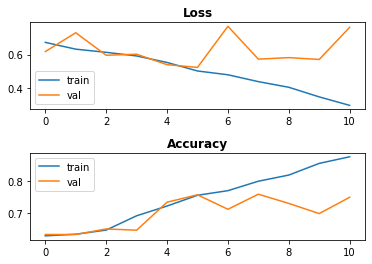



Confusion Matrix, without normalization


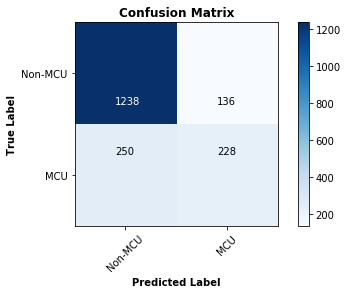



              precision    recall  f1-score   support

     Non-MCU       0.83      0.90      0.87      1374
         MCU       0.63      0.48      0.54       478

    accuracy                           0.79      1852
   macro avg       0.73      0.69      0.70      1852
weighted avg       0.78      0.79      0.78      1852



In [13]:
print(mf.evaluate_test(model_5x5, history_5x5, class_labels, train_images, test_images, train_y, test_y))

### 6x6

In [14]:
model_6x6 = models.Sequential()
model_6x6.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_6x6.add(layers.MaxPooling2D((2, 2)))

model_6x6.add(layers.Conv2D(32, (6, 6), activation='relu'))
model_6x6.add(layers.MaxPooling2D((2, 2)))

model_6x6.add(layers.Conv2D(32, (5, 5), activation='relu'))
model_6x6.add(layers.MaxPooling2D((2, 2)))

model_6x6.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_6x6.add(layers.MaxPooling2D((2, 2)))

model_6x6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_6x6.add(layers.MaxPooling2D((2, 2)))

model_6x6.add(layers.Flatten())
model_6x6.add(layers.Dense(64, activation='relu'))
model_6x6.add(layers.Dense(1, activation='sigmoid'))

model_6x6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [15]:
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_6x6 = model_6x6.fit(train_images,
                                                 train_y,
                                                 epochs=50,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y),
                                                callbacks=early_stopping)

Train on 4172 samples, validate on 1042 samples
Epoch 1/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.6771 - acc: 0.6294 - val_loss: 0.6291 - val_acc: 0.6324
Epoch 2/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.6369 - acc: 0.6323 - val_loss: 0.6023 - val_acc: 0.6324
Epoch 3/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.6343 - acc: 0.6457 - val_loss: 0.6008 - val_acc: 0.6344
Epoch 4/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.6028 - acc: 0.6690 - val_loss: 0.5779 - val_acc: 0.6641
Epoch 5/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.5879 - acc: 0.6922 - val_loss: 0.5537 - val_acc: 0.7169
Epoch 6/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.5524 - acc: 0.7169 - val_loss: 0.5386 - val_acc: 0.7322
Epoch 7/50
4172/4172 [==============================] - 5s 1ms/step - loss: 0.5150 - acc: 0.7474 - val_loss: 0.6015 - val_acc: 0.7198
Epoch 8/50
417

Accuracy 
 Train: 0.811, Test: 0.639
Loss 
 Train: 0.408, Test: 0.808 



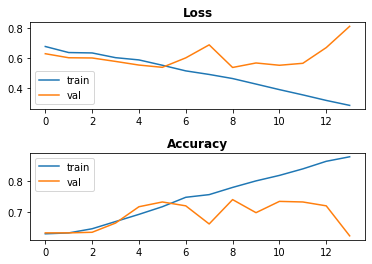



Confusion Matrix, without normalization


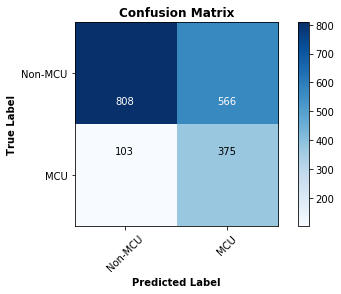



              precision    recall  f1-score   support

     Non-MCU       0.89      0.59      0.71      1374
         MCU       0.40      0.78      0.53       478

    accuracy                           0.64      1852
   macro avg       0.64      0.69      0.62      1852
weighted avg       0.76      0.64      0.66      1852



In [16]:
print(mf.evaluate_test(model_6x6, history_6x6, class_labels, train_images, test_images, train_y, test_y))

# Units

In [17]:
model_units_input_x2 = models.Sequential()
model_units_input_x2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_units_input_x2.add(layers.MaxPooling2D((2, 2)))

model_units_input_x2.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_units_input_x2.add(layers.MaxPooling2D((2, 2)))

model_units_input_x2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_units_input_x2.add(layers.MaxPooling2D((2, 2)))

model_units_input_x2.add(layers.Flatten())
model_units_input_x2.add(layers.Dense(64, activation='relu'))
model_units_input_x2.add(layers.Dense(1, activation='sigmoid'))

model_units_input_x2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [18]:
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_units_input_x2 = model_units_input_x2.fit(train_images,
                                                 train_y,
                                                 epochs=50,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y),
                                                 callbacks=early_stopping)

Train on 4172 samples, validate on 1042 samples
Epoch 1/50
4172/4172 [==============================] - 10s 2ms/step - loss: 0.7176 - acc: 0.6191 - val_loss: 0.6472 - val_acc: 0.6324
Epoch 2/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.6288 - acc: 0.6376 - val_loss: 0.6465 - val_acc: 0.6276
Epoch 3/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.5938 - acc: 0.6822 - val_loss: 0.5921 - val_acc: 0.6756
Epoch 4/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.5403 - acc: 0.7275 - val_loss: 0.5361 - val_acc: 0.7466
Epoch 5/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.4892 - acc: 0.7637 - val_loss: 0.5572 - val_acc: 0.7025
Epoch 6/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.4134 - acc: 0.8051 - val_loss: 0.5363 - val_acc: 0.7543
Epoch 7/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.3468 - acc: 0.8490 - val_loss: 0.5954 - val_acc: 0.7322
Epoch 8/50
41

Accuracy 
 Train: 0.893, Test: 0.730
Loss 
 Train: 0.241, Test: 0.802 



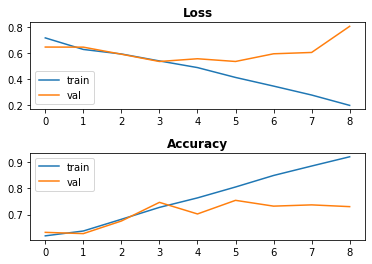



Confusion Matrix, without normalization


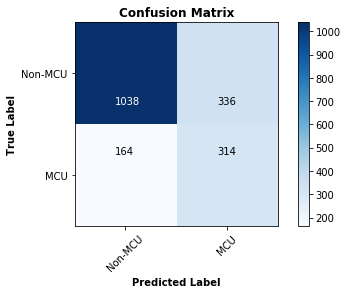



              precision    recall  f1-score   support

     Non-MCU       0.86      0.76      0.81      1374
         MCU       0.48      0.66      0.56       478

    accuracy                           0.73      1852
   macro avg       0.67      0.71      0.68      1852
weighted avg       0.77      0.73      0.74      1852



In [19]:
print(mf.evaluate_test(model_units_input_x2, history_units_input_x2, class_labels, train_images, test_images, train_y, test_y))

In [24]:
model_units_hidden_x2 = models.Sequential()
model_units_hidden_x2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_units_hidden_x2.add(layers.MaxPooling2D((2, 2)))

model_units_hidden_x2.add(layers.Conv2D(128, (4, 4), activation='relu'))
model_units_hidden_x2.add(layers.MaxPooling2D((2, 2)))

model_units_hidden_x2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_units_hidden_x2.add(layers.MaxPooling2D((2, 2)))

model_units_hidden_x2.add(layers.Flatten())
model_units_hidden_x2.add(layers.Dense(64, activation='relu'))
model_units_hidden_x2.add(layers.Dense(1, activation='sigmoid'))

model_units_hidden_x2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [25]:
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_units_hidden_x2 = model_units_hidden_x2.fit(train_images,
                                                 train_y,
                                                 epochs=50,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y),
                                                 callbacks=early_stopping)

Train on 4172 samples, validate on 1042 samples
Epoch 1/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.8199 - acc: 0.6167 - val_loss: 0.6188 - val_acc: 0.6324
Epoch 2/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.6399 - acc: 0.6328 - val_loss: 0.6165 - val_acc: 0.6324
Epoch 3/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.5992 - acc: 0.6719 - val_loss: 1.1048 - val_acc: 0.6334
Epoch 4/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.5564 - acc: 0.7150 - val_loss: 0.5440 - val_acc: 0.7332
Epoch 5/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.4991 - acc: 0.7466 - val_loss: 0.5625 - val_acc: 0.7255
Epoch 6/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.4310 - acc: 0.8001 - val_loss: 0.7454 - val_acc: 0.6132
Epoch 7/50
4172/4172 [==============================] - 9s 2ms/step - loss: 0.3649 - acc: 0.8392 - val_loss: 0.6444 - val_acc: 0.6881
Epoch 8/50
417

Accuracy 
 Train: 0.947, Test: 0.721
Loss 
 Train: 0.138, Test: 0.709 



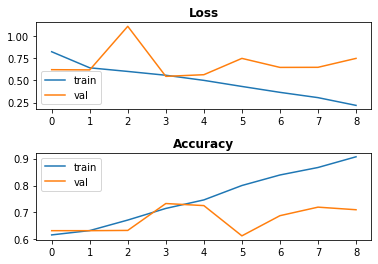



Confusion Matrix, without normalization


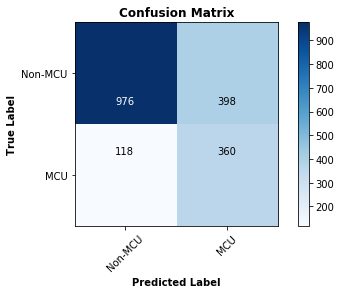



              precision    recall  f1-score   support

     Non-MCU       0.89      0.71      0.79      1374
         MCU       0.47      0.75      0.58       478

    accuracy                           0.72      1852
   macro avg       0.68      0.73      0.69      1852
weighted avg       0.78      0.72      0.74      1852



In [26]:
print(mf.evaluate_test(model_units_hidden_x2, history_units_hidden_x2, class_labels, train_images, test_images, train_y, test_y))

In [27]:
model_units_hidden_x4 = models.Sequential()
model_units_hidden_x4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_units_hidden_x4.add(layers.MaxPooling2D((2, 2)))

model_units_hidden_x4.add(layers.Conv2D(256, (4, 4), activation='relu'))
model_units_hidden_x4.add(layers.MaxPooling2D((2, 2)))

model_units_hidden_x4.add(layers.Conv2D(512, (3, 3), activation='relu'))
model_units_hidden_x4.add(layers.MaxPooling2D((2, 2)))

model_units_hidden_x4.add(layers.Flatten())
model_units_hidden_x4.add(layers.Dense(64, activation='relu'))
model_units_hidden_x4.add(layers.Dense(1, activation='sigmoid'))

model_units_hidden_x4.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [28]:
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_units_hidden_x4 = model_units_hidden_x4.fit(train_images,
                                                 train_y,
                                                 epochs=50,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y),
                                                 callbacks=early_stopping)

Train on 4172 samples, validate on 1042 samples
Epoch 1/50
4172/4172 [==============================] - 18s 4ms/step - loss: 1.0953 - acc: 0.6136 - val_loss: 1.9821 - val_acc: 0.6324
Epoch 2/50
4172/4172 [==============================] - 15s 4ms/step - loss: 0.6656 - acc: 0.6326 - val_loss: 0.7840 - val_acc: 0.6324
Epoch 3/50
4172/4172 [==============================] - 15s 4ms/step - loss: 0.6226 - acc: 0.6326 - val_loss: 0.5914 - val_acc: 0.6324
Epoch 4/50
4172/4172 [==============================] - 16s 4ms/step - loss: 0.5837 - acc: 0.6843 - val_loss: 0.5651 - val_acc: 0.6862
Epoch 5/50
4172/4172 [==============================] - 16s 4ms/step - loss: 0.5498 - acc: 0.7256 - val_loss: 0.5684 - val_acc: 0.6919
Epoch 6/50
4172/4172 [==============================] - 16s 4ms/step - loss: 0.5200 - acc: 0.7385 - val_loss: 0.5849 - val_acc: 0.6900
Epoch 7/50
4172/4172 [==============================] - 16s 4ms/step - loss: 0.4843 - acc: 0.7756 - val_loss: 0.5771 - val_acc: 0.6977
Epoch 8

Accuracy 
 Train: 0.797, Test: 0.772
Loss 
 Train: 0.411, Test: 0.622 



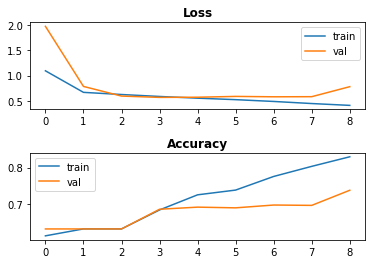



Confusion Matrix, without normalization


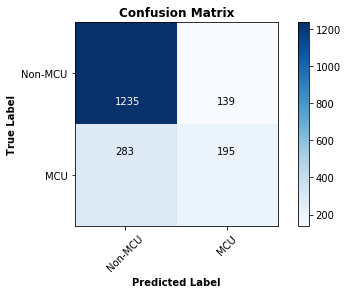



              precision    recall  f1-score   support

     Non-MCU       0.81      0.90      0.85      1374
         MCU       0.58      0.41      0.48       478

    accuracy                           0.77      1852
   macro avg       0.70      0.65      0.67      1852
weighted avg       0.75      0.77      0.76      1852



In [29]:
print(mf.evaluate_test(model_units_hidden_x4, history_units_hidden_x4, class_labels, train_images, test_images, train_y, test_y))